In [1]:
from pathlib import Path
from typing import List, Tuple, Dict

# Wav Features and Visualization
import librosa
import IPython.display as ipd
# Basics
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Machine Learning
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
import os
general_path = 'C:/Users/user/Desktop/MLInProd/dz1/dz1/data/raw/train'
print(list(os.listdir(f'{general_path}')))

# Interpretation

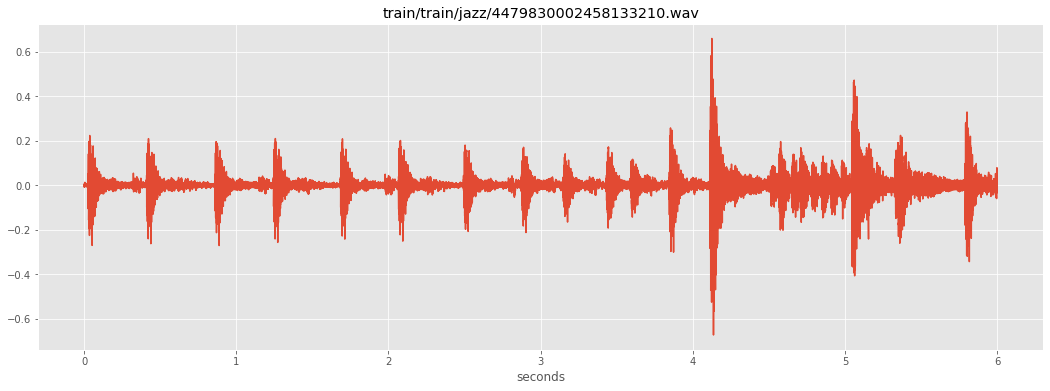

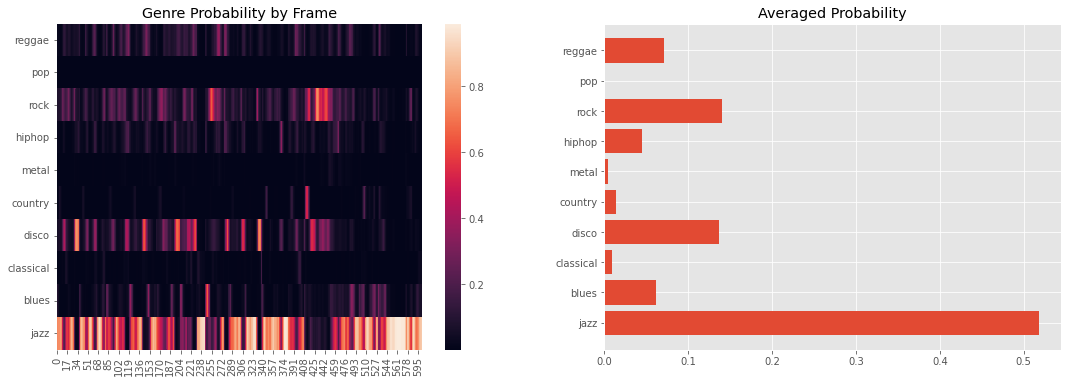

In [ ]:
test_id = 890

#predictions = pipe.predict_proba(np.vstack(features_train[test_id]))

plt.figure(figsize=(18,6))
plt.title(files_train[test_id])
wave_form = load_wav(files_train[test_id], sample_rate=params['sample_rate'])
time_axis = [x / params['sample_rate'] for x in range(wave_form.size)]
plt.plot(time_axis, wave_form)
plt.xlabel('seconds')
plt.show()

ipd.display(ipd.Audio(str(files_train[test_id])))
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.title('Genre Probability by Frame')
sns.heatmap(
    predictions.T,
    yticklabels=class_names
)

plt.subplot(122)
plt.title('Averaged Probability')
plt.barh(class_names, predictions.mean(0))
plt.gca().invert_yaxis()
plt.show()

## Confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def plot_conf_matrix(y_test: np.ndarray, y_pred: np.ndarray, class_names: List[str], annot: bool=False) -> None:
    
    plt.figure(figsize=(8,6))
    plt.title(f"Accuracy: {accuracy_score(y_pred, y_test)}")
    sns.heatmap(
        confusion_matrix(y_test, y_pred), 
        xticklabels=class_names, 
        yticklabels=class_names,
        linewidths=.5,
        annot=annot
    )
    plt.show()

### by frame

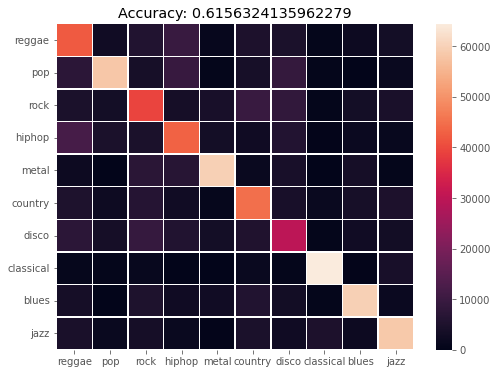

In [ ]:
X_test = np.vstack([
    feature for feature_list in features_test 
    for feature in feature_list
])

y_test = np.array([label for label_list in labels_test for label in label_list])

y_pred = pipe.predict(X_test)

plot_conf_matrix(y_pred, y_test, class_names)

### by record

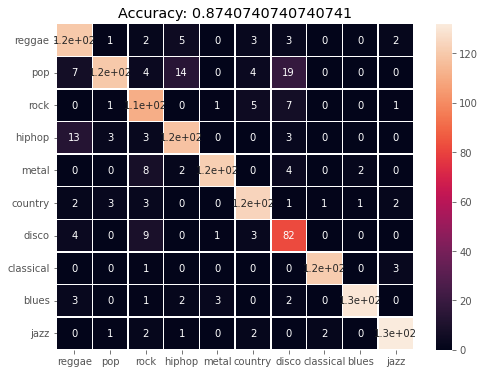

In [ ]:
y_pred = np.array([
    pipe.predict_proba(np.vstack(feature_list)).mean(0).argmax()
    for feature_list in features_test
])

y_test = np.array([label_list[0] for label_list in labels_test])

plot_conf_matrix(y_pred, y_test, class_names, annot=True)

# Test

In [ ]:
test_features, _, test_pathes = load_folder_data(test_path, train=False, params=params)

100%|██████████| 500/500 [02:36<00:00,  3.20it/s]


In [ ]:
predictions = [
    class_names[
        pipe.predict_proba(
            np.vstack(test_feature)
        ).mean(0).argmax()
    ]
    for test_feature in test_features
]

In [ ]:
(
    pd.DataFrame({
        'index': [test_wav_path.name for test_wav_path in test_path.iterdir()],
        'genre': predictions
    })
    .to_csv('submit.csv', index=False)
)